# Data Cleaning

In [12]:
import pandas as pd
import numpy as np
import re

In [3]:
events_df = pd.read_csv('events.csv')
results_df = pd.read_csv('results.csv')

In [9]:
events_info = events_df.info()
events_head = events_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   local_time     139 non-null    object
 1   sex            139 non-null    object
 2   event          139 non-null    object
 3   round          139 non-null    object
 4   startlist_url  139 non-null    object
 5   results_url    139 non-null    object
 6   summary_url    93 non-null     object
 7   points_url     20 non-null     object
dtypes: object(8)
memory usage: 8.8+ KB


In [4]:
results_info = results_df.info()
results_head = results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   local_time     3550 non-null   object 
 1   sex            3550 non-null   object 
 2   event          3550 non-null   object 
 3   round          3550 non-null   object 
 4   startlist_url  3550 non-null   object 
 5   results_url    3550 non-null   object 
 6   summary_url    2777 non-null   object 
 7   points_url     435 non-null    object 
 8   pos            3401 non-null   float64
 9   bib            3404 non-null   float64
 10  name           3550 non-null   object 
 11  country        3550 non-null   object 
 12  mark           3550 non-null   object 
dtypes: float64(2), object(11)
memory usage: 360.7+ KB


In [5]:
results_cleaned = results_df.copy()

In [6]:
results_cleaned.columns = results_cleaned.columns.str.lower()

In [7]:
results_cleaned['gender'] = results_cleaned['sex'].map({'M':'Male','W':'Female'})

In [8]:
def convert_mark(mark):
  if isinstance(mark, str):
    if ':' in mark:
      parts = mark.split(':')
      if all(p.replace('.', '', 1).isdigit() for p in parts):
        parts = [float(p) for p in parts]
      if len(parts) == 3:
        return parts[0]*3600 + parts[1]*60 + parts[2]
      elif len(parts) == 2:
        return parts[0]*3600 + parts[1]*60
    else:
      try:
        return float(mark)
      except:
        return np.nan
  return np.nan

results_cleaned['mark_numeric'] = results_cleaned['mark'].apply(convert_mark)


In [9]:
def assign_medal(pos):
  if pos == 1:
    return 'Gold'
  elif pos == 2:
    return 'Silver'
  elif pos == 3:
    return 'Bronze'
  else:
    return 'None'

results_cleaned['medal'] = results_cleaned['pos'].apply(lambda x: assign_medal(int(x)) if pd.notnull(x) else None)

In [10]:
columns_to_keep = ['local_time','gender','event','round','name','country','mark','mark_numeric','pos','medal']
results_cleaned = results_cleaned[columns_to_keep]

In [11]:
summary = results_cleaned.describe(include='all')
missing_values = results_cleaned.isnull().sum()

results_cleaned.head(), summary, missing_values

(  local_time gender                    event  round                  name  \
 0      08:00   Male  20 Kilometres Race Walk  Final  Brian Daniel PINTADO   
 1      08:00   Male  20 Kilometres Race Walk  Final           Caio BONFIM   
 2      08:00   Male  20 Kilometres Race Walk  Final         Álvaro MARTÍN   
 3      08:00   Male  20 Kilometres Race Walk  Final         Massimo STANO   
 4      08:00   Male  20 Kilometres Race Walk  Final           Evan DUNFEE   
 
   country      mark mark_numeric  pos   medal  
 0     ECU  01:18:55       4735.0  1.0    Gold  
 1     BRA  01:19:09       4749.0  2.0  Silver  
 2     ESP  01:19:11       4751.0  3.0  Bronze  
 3     ITA  01:19:12       4752.0  4.0    None  
 4     CAN  01:19:16       4756.0  5.0    None  ,
        local_time gender       event  round         name country  mark  \
 count        3550   3501        3550   3550         3550    3550  3550   
 unique         75      2          24     14         1728     199  2697   
 top      

In [14]:
def convert_mark_safe(mark):
  if isinstance(mark, str):
    cleaned = re.sub(r"[^\d:\.]","", mark)
    if ':' in cleaned:
      parts = cleaned.split(':')
      try:
        parts = [float(p) for p in parts]
        if len(parts) == 3:
          return parts[0]*3600 + parts[1]*60 + parts[2]
        elif len(parts) == 2:
          return parts[0]*3600 + parts[1]*60
      except:
        return np.nan
      else:
        try:
          return float(cleaned)
        except:
          return np.nan
  return np.nan

results_cleaned['mark_numeric'] = results_cleaned['mark'].apply(convert_mark_safe)

results_cleaned['medal'] = results_cleaned['pos'].apply(lambda x:assign_medal(int(x)) if pd.notnull(x) else None)

columns_to_keep = ['local_time','gender','event','round','name','country','mark','mark_numeric','pos','medal']
results_cleaned = results_cleaned[columns_to_keep]

summary_cleaned = results_cleaned.describe(include='all')
missing_cleaned = results_cleaned.isnull().sum()

results_cleaned.head(), summary_cleaned, missing_cleaned

(  local_time gender                    event  round                  name  \
 0      08:00   Male  20 Kilometres Race Walk  Final  Brian Daniel PINTADO   
 1      08:00   Male  20 Kilometres Race Walk  Final           Caio BONFIM   
 2      08:00   Male  20 Kilometres Race Walk  Final         Álvaro MARTÍN   
 3      08:00   Male  20 Kilometres Race Walk  Final         Massimo STANO   
 4      08:00   Male  20 Kilometres Race Walk  Final           Evan DUNFEE   
 
   country      mark  mark_numeric  pos   medal  
 0     ECU  01:18:55        4735.0  1.0    Gold  
 1     BRA  01:19:09        4749.0  2.0  Silver  
 2     ESP  01:19:11        4751.0  3.0  Bronze  
 3     ITA  01:19:12        4752.0  4.0    None  
 4     CAN  01:19:16        4756.0  5.0    None  ,
        local_time gender       event  round         name country  mark  \
 count        3550   3501        3550   3550         3550    3550  3550   
 unique         75      2          24     14         1728     199  2697   
 top

# Data Analysis

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

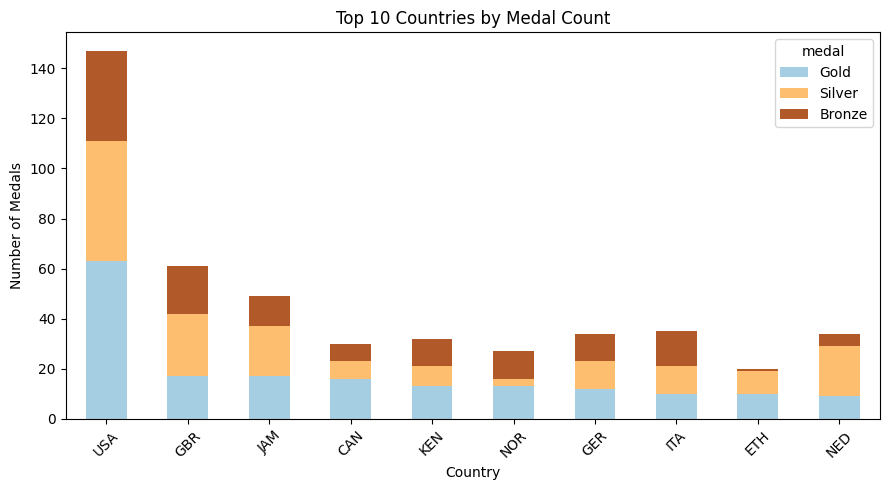

In [75]:
medal_counts = results_cleaned[results_cleaned['medal'].notna()] \
    .groupby(['country', 'medal']).size().unstack().fillna(0)

medal_counts[['Gold','Silver','Bronze']].sort_values(by='Gold', ascending=False).head(10).plot(
    kind='bar',
    stacked=True,
    figsize=(9,5),
    colormap='Paired'
)

plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

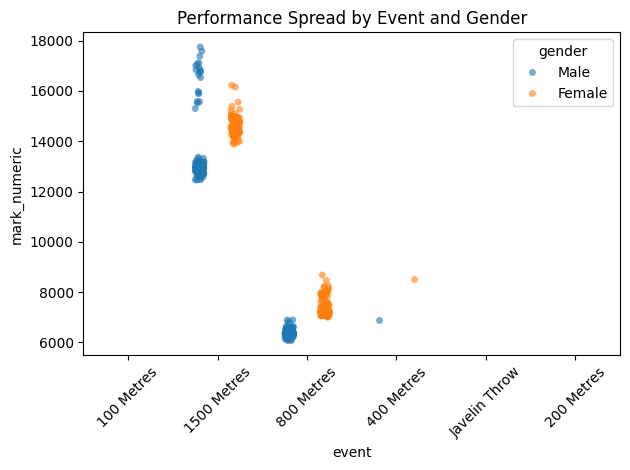

In [55]:
sns.stripplot(data=results_cleaned[results_cleaned['event'].isin(top_events)],
              x='event', y='mark_numeric', hue='gender', dodge=True, alpha=0.6)
plt.title('Performance Spread by Event and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

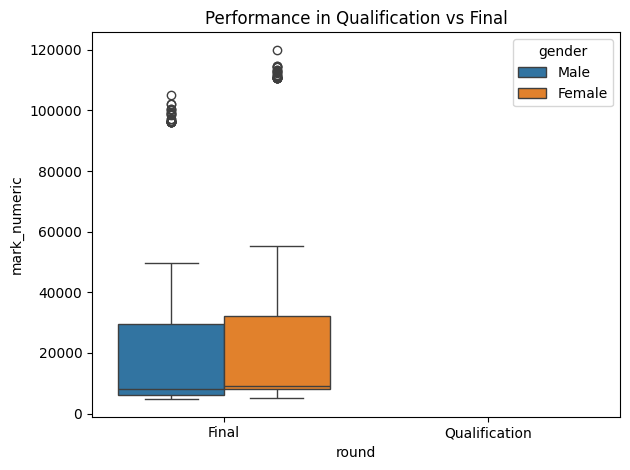

In [51]:
sns.boxplot(data=results_cleaned[results_cleaned['round'].isin(['Qualification', 'Final'])],
            x='round', y='mark_numeric', hue='gender')
plt.title('Performance in Qualification vs Final')
plt.tight_layout()
plt.show()

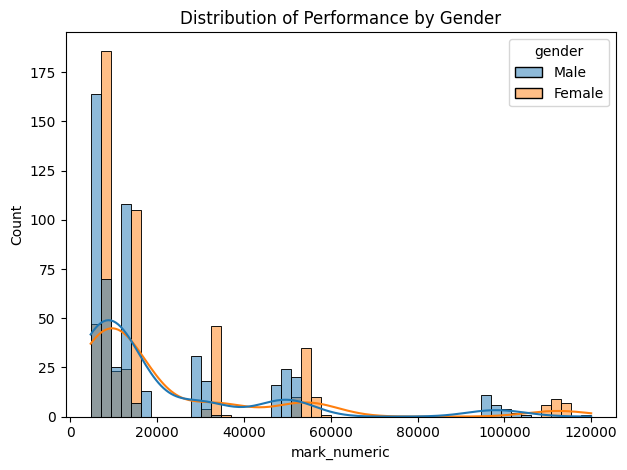

In [52]:
sns.histplot(data=results_cleaned, x='mark_numeric', hue='gender', kde=True, bins=50)
plt.title('Distribution of Performance by Gender')
plt.tight_layout()
plt.show()

In [53]:
best_performances = results_cleaned.sort_values('mark_numeric').dropna(subset=['mark_numeric']) \
    .groupby('event').first().reset_index()[['event', 'name', 'country', 'mark', 'mark_numeric']]

print(best_performances.head(10))

                      event                  name country         mark  \
0             10,000 Metres      Joshua CHEPTEGEI     UGA  26:43.14 OR   
1               1500 Metres           Cole HOCKER     USA   3:27.65 OR   
2   20 Kilometres Race Walk  Brian Daniel PINTADO     ECU     01:18:55   
3  3000 Metres Steeplechase   Soufiane EL BAKKALI     MAR   8:06.05 SB   
4                400 Metres        Alexander DOOM     BEL      01:55.1   
5        400 Metres Hurdles          Lina NIELSEN     GBR      01:31.2   
6        4x400 Metres Relay         United States     USA   2:54.43 OR   
7               5000 Metres    Jakob INGEBRIGTSEN     NOR  13:13.66 SB   
8                800 Metres     Emmanuel WANYONYI     KEN   1:41.19 PB   
9                  Marathon          Tamirat TOLA     ETH   2:06:26 OR   

   mark_numeric  
0       96188.4  
1       12459.0  
2        4735.0  
3       29163.0  
4        6906.0  
5        5472.0  
6       10465.8  
7       47619.6  
8        6071.4  
9    

In [56]:
best_performances = results_cleaned.dropna(subset=['mark_numeric']) \
    .sort_values('mark_numeric') \
    .groupby('event').first().reset_index()[['event', 'name', 'country', 'mark', 'mark_numeric', 'gender', 'round']]

# Sort by mark (performance) to display top ones
best_performances = best_performances.sort_values(by='mark_numeric').head(15)

best_performances.style.set_caption("🏅 Top 15 Performances Across Events") \
    .format({'mark_numeric': '{:.2f}'}) \
    .hide(axis='index')

event,name,country,mark,mark_numeric,gender,round
20 Kilometres Race Walk,Brian Daniel PINTADO,ECU,01:18:55,4735.00,Male,Final
400 Metres Hurdles,Lina NIELSEN,GBR,01:31.2,5472.00,Female,Semi-Final
800 Metres,Emmanuel WANYONYI,KEN,1:41.19 PB,6071.40,Male,Final
400 Metres,Alexander DOOM,BEL,01:55.1,6906.00,Male,Semi-Final
Marathon,Tamirat TOLA,ETH,2:06:26 OR,7586.00,Male,Final
Marathon Race Walk Mixed Relay,Spain,ESP,02:50:31,10231.00,None,Final
4x400 Metres Relay,United States,USA,2:54.43 OR,10465.80,Male,Final
1500 Metres,Cole HOCKER,USA,3:27.65 OR,12459.00,Male,Final
3000 Metres Steeplechase,Soufiane EL BAKKALI,MAR,8:06.05 SB,29163.00,Male,Final
5000 Metres,Jakob INGEBRIGTSEN,NOR,13:13.66 SB,47619.60,Male,Final


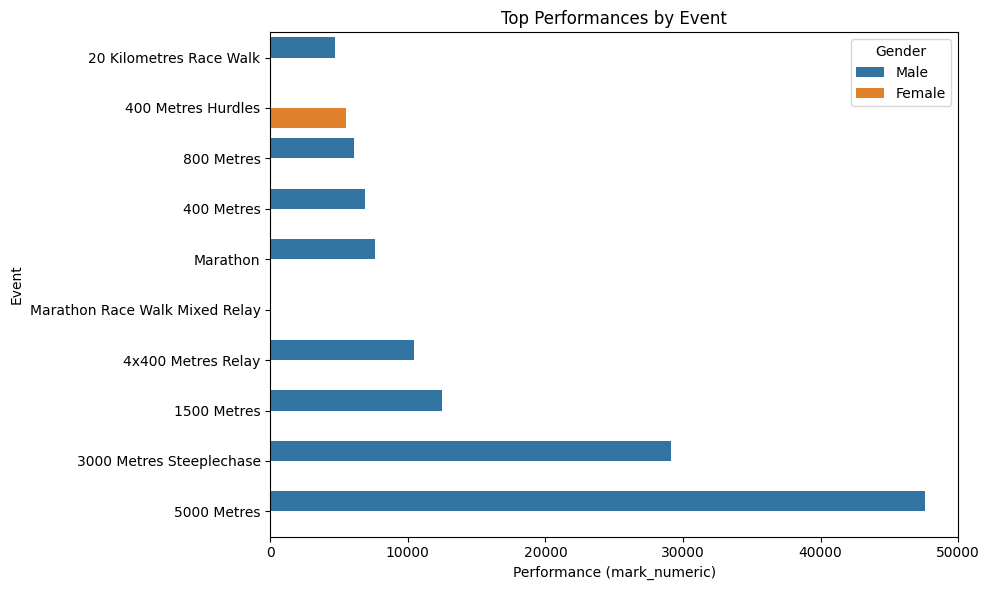

In [68]:
import matplotlib.pyplot as plt

top_plot = best_performances.sort_values(by='mark_numeric', ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_plot, y='event', x='mark_numeric', hue='gender', palette='tab10')
plt.title('Top Performances by Event')
plt.xlabel('Performance (mark_numeric)')
plt.ylabel('Event')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()